<a href="https://colab.research.google.com/github/sudharshanpaul/Machine-Learning/blob/main/EDA/Feature_Binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Binning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [12]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [13]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,NaN,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,NaN,NaN,2.0,125510.82,1,1,1,79084.10,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9884 non-null   object 
 6   Age              9864 non-null   float64
 7   Tenure           9999 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


Age and Tenure are numerical values so that we can perform feature binning

In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)   # inplace = True means we don't need tp assign anything the original datframe is modified
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,NaN,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,NaN,NaN,2.0,125510.82,1,1,1,79084.10,0


In [17]:
df.Age.min()

18.0

In [18]:
df.Age.max()

92.0

In [21]:
labels = ['0-20','21-40','41-60','60+']
bins = [0,20,40,60,100]

df['Age_bins'] = pd.cut(df.Age,bins=bins,labels=labels,include_lowest=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,NaN,2.0,0.00,1,1,1,101348.88,1,NaN
1,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,NaN,NaN,2.0,125510.82,1,1,1,79084.10,0,NaN


In [23]:
df[['Age',"Age_bins"]]

,Age,Age_bins
0,NaN,NaN
1,41.0,41-60
2,42.0,41-60
3,39.0,21-40
4,NaN,NaN
...,...,...
9995,39.0,21-40
9996,35.0,21-40
9997,36.0,21-40
9998,42.0,41-60


In [24]:
df.Age_bins.value_counts()

,count
Age_bins,
21-40,6247
41-60,3074
60+,455
0-20,88


Text(0, 0.5, 'Age Count')

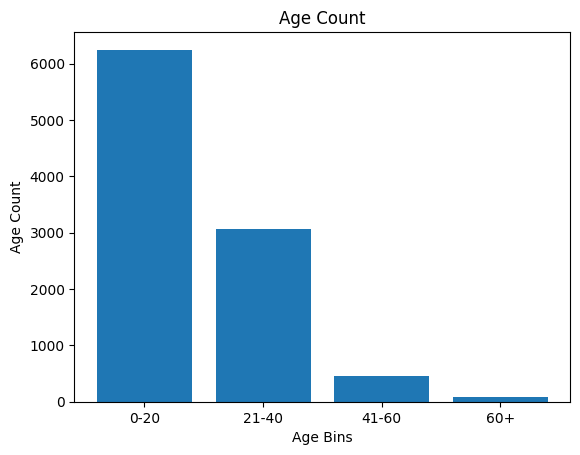

In [27]:
plt.bar(labels,df.Age_bins.value_counts())

plt.title('Age Count')
plt.xlabel('Age Bins')
plt.ylabel('Age Count')

In [32]:
def add_labels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i])

In [35]:
df.Age_bins.value_counts()[0]

<ipython-input-35-fcad3382b3d7>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.Age_bins.value_counts()[0]


6247

<ipython-input-32-87420b12248d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i,y[i],y[i])


Text(0, 0.5, 'Age Count')

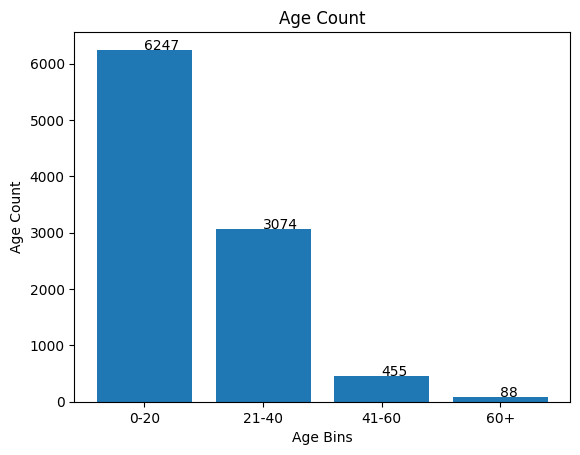

In [33]:
plt.bar(labels,df.Age_bins.value_counts())

add_labels(labels,df.Age_bins.value_counts())

plt.title('Age Count')
plt.xlabel('Age Bins')
plt.ylabel('Age Count')